## Lab - YOLOv4-Tiny - Converting YOLOv4-Tiny to PyTorch + Inference
## E6692 Spring 2022

In this notebook you will evaluate your model on the validation set and convert it to PyTorch for inference.

**TODO:** Insert your training plot here. It should show decreasing training loss and increasing validation mAP.

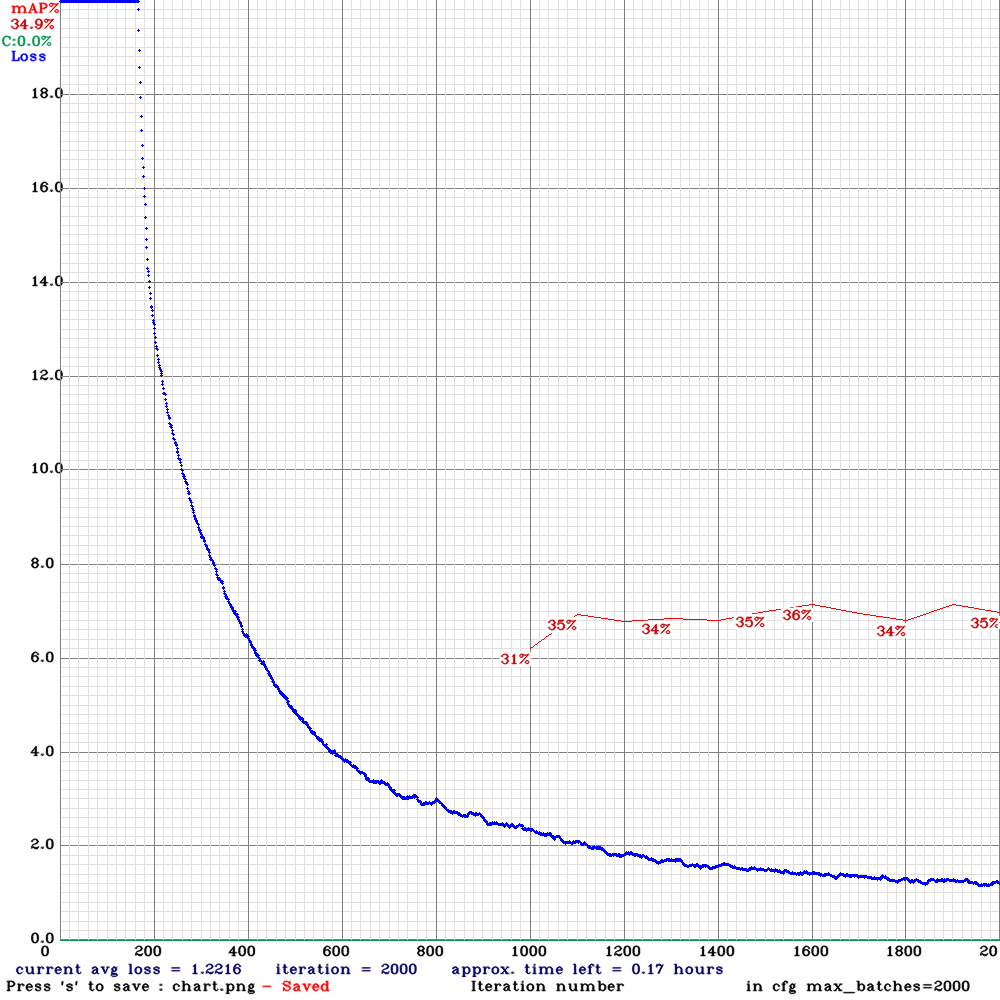

**TODO:** Discuss your training plot and the training process. How long did it take to train? What input resolution did you choose? What accuracy do you expect your model to achieve based on the training plot?

At first the loss is very high and is out of the chart. After 100-200 iterations, the loss decreases exponentialy.

It took 3 hours to train. At first I was using 2-core cpu and it was going to take more than twenty hours. Then I upgraded the instance by changed a 8-core cpu and decreased the number of training iterations. It eventually took 2 hours to train the model.

The input solution was 480*640.

I hope it can have an accuracy about 35%.

**TODO:** Evaluate the validation mAP performance of your model with the following command:

`darknet detector map <data_cfg_path> <model_cfg_path> <best_weights_path>`

Replace this example output with a screenshot of your evaluation results:
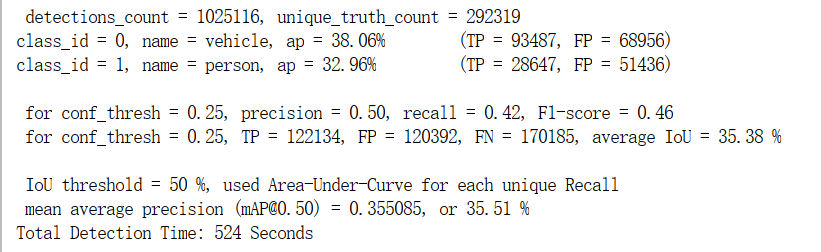


**TODO:** Interpret the results. What is the purpose of this model and which metrics can we consider as "key performance indicators"?

The purpose of this model is to see the performance of the training result. 

mAP should be the key performance indicators.


Next we will visually inspect some inferences on validation frames. 

In [8]:
# complete on VM instance
import os
import random

from darknet_utils.inference import image_inference
from darknet_utils.darknet_to_pytorch import load_darknet_as_pytorch

device = 'cuda'

cfg_path = './cfg/yolov4-tiny-person-vehicle.cfg'
weights_path = './darknet/backup/yolov4-tiny-person-vehicle_best.weights'
torch_weights_path = 'weights/yolov4-tiny-person-vehicle_best.pt'

validation_dataset_path = './data/validation/person-vehicle-yolov4-tiny'

CONF_THRESH = 0.4
NMS_THRESH = 0.4

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# TODO: load YOLOv4-Tiny as a PyTorch model with load_darknet_as_pytorch()
model = load_darknet_as_pytorch(cfg_path, weights_path)

**TODO:** Visualize inferences on at least three validation frames. Select the frames randomly from the validation set. Ideally the selected frames will be from different videos and therefore visually distinct. You may find it useful to implement the function **image_inference()** in **darknet_utils/inference.py**.


torch.Size([1, 3, 480, 640])


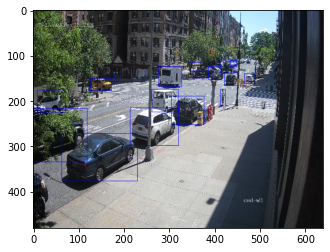

In [31]:
# TODO: Visualize inferences on randomly selected validation frames

val_path = './data/validation'

# randomly load one image from the validation directory
count = 0
while count < 1:
    img_name = random.choice(os.listdir(val_path))
    if '.jpg' in img_name:
        count += 1
        img_path = os.path.join(val_path, img_name)


conf_thresh = 0.5
nms_thresh = 0.5

image_inference(img_path, model, conf_thresh, nms_thresh)